In [1]:
import sys
from pathlib import Path
from collections import Counter
import timeit
import pickle

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [3]:
data_dir = Path.cwd().parent.joinpath('src').joinpath('data')
vis_dir = Path.cwd().parent.joinpath('src').joinpath('visualization')
sys.path.insert(1, str(data_dir))
sys.path.insert(1, str(vis_dir))

In [4]:
from hit_generator import stochastic
from plot import plot_in_RAM
from util import small_helix_check

In [5]:
track_dir = Path.cwd().parent.joinpath('data').joinpath('raw')
db_list = ["train_CeEndpoint-mix-fromCSV_1.db",
               "train_CeEndpoint-mix-fromCSV_2.db",\
               "train_CeEndpoint-mix-fromCSV_3.db"]
file_list = [track_dir.joinpath(db) for db in db_list]

In [6]:
dist = uniform(loc=1, scale=0)

In [7]:
gen = stochastic(dist=dist, db_files=file_list, hitNumCut=20)

1.0
0.07058824


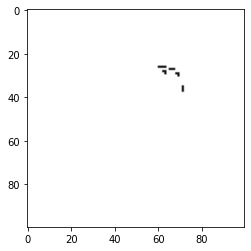

In [12]:
N_data = 1
N_generated = 0
while N_generated < N_data:
    hits = gen.generate(mode='production')
    if small_helix_check(hits,dx_min=100,dy_min=100):
        continue
    else:
        x = plot_in_RAM(hits, 100)
        x = x.reshape(100,100)
        print(x.max())
        print(x.min())
        plt.imshow(x,'gray',vmin=0,vmax=1)
        plt.show()
        N_generated += 1